In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, ceil
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, \
recall_score, f1_score, roc_curve, auc

2024-02-22 14:44:22.491218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 14:44:22.491467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 14:44:22.705549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 1
_Preparación de Datos_

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

idx_y_train_5 = np.where(y_train == 5)[0]
idx_y_train_n5 = np.where(y_train != 5)[0]
idx_y_train_n5 = np.random.choice(idx_y_train_n5, 
                                  idx_y_train_5.shape[0], 
                                  replace=False)

idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
np.random.shuffle(idx_y_train)
x_train = x_train[idx_y_train]
y_train = y_train[idx_y_train]

idx_y_test_5 = np.where(y_test == 5)[0]
idx_y_test_n5 = np.where(y_test != 5)[0]
idx_y_test_n5 = np.random.choice(idx_y_test_n5, 
                                  idx_y_test_5.shape[0], 
                                  replace=False)
idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
np.random.shuffle(idx_y_test)
x_test = x_test[idx_y_test]
y_test = y_test[idx_y_test]

y_train_binary = (y_train == 5).astype(int)
y_test_binary  = (y_test == 5).astype(int)

11490434/11490434 [==============================] - 1s 0us/step


# 2 
_Implementación de una red neuronal multicapa_

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 3
_Entrenamiento del Modelo_

In [4]:
early_call = EarlyStopping(monitor='accuracy', patience=5,
                           restore_best_weights=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
fit_history = model.fit(x_train, y_train_binary, epochs=50, 
                        batch_size=64, validation_split=0.2,
                        callbacks=[early_call])

Epoch 1/50
136/136 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8463 - val_loss: 0.2994 - val_accuracy: 0.8972
Epoch 2/50
136/136 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9057 - val_loss: 0.2467 - val_accuracy: 0.9101
Epoch 3/50
136/136 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9163 - val_loss: 0.2286 - val_accuracy: 0.9133
Epoch 4/50
136/136 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9199 - val_loss: 0.2282 - val_accuracy: 0.9092
Epoch 5/50
136/136 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9247 - val_loss: 0.2134 - val_accuracy: 0.9179
Epoch 6/50
136/136 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9263 - val_loss: 0.2038 - val_accuracy: 0.9216
Epoch 7/50
136/136 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9286 - val_loss: 0.2022 - val_accuracy: 0.9230
Epoch 

# 4 
_Evaluación del Modelo_

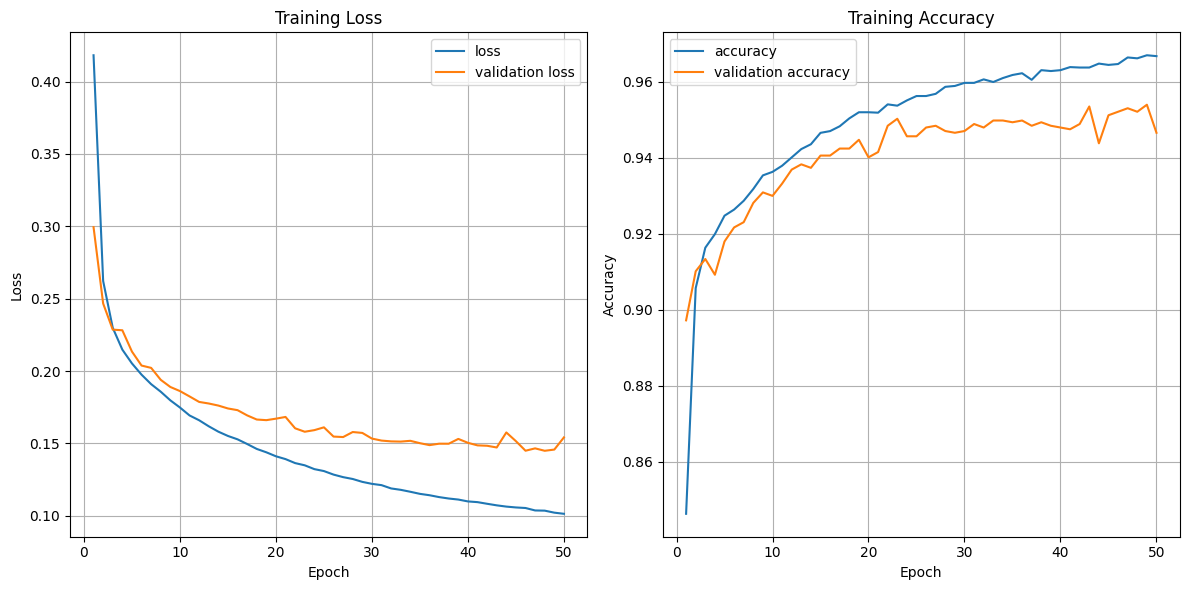

In [5]:
loss = fit_history.history['loss']
acc  = fit_history.history['accuracy']
val_loss = fit_history.history['val_loss']
val_acc  = fit_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

56/56 [==============================] - 0s 1ms/step


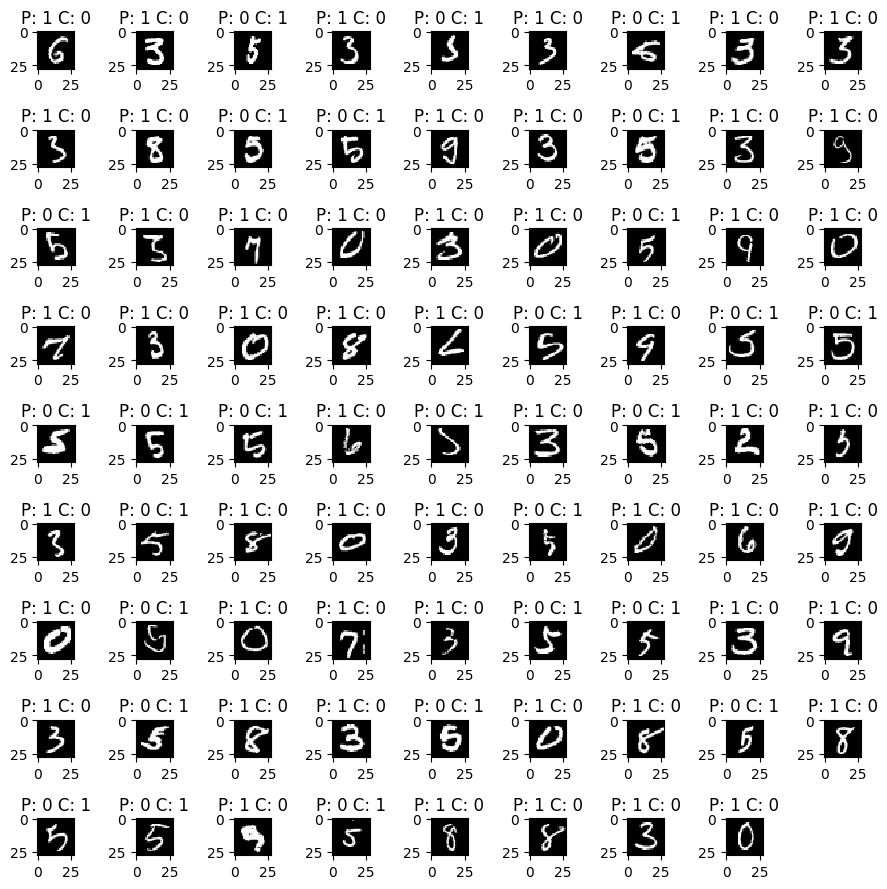

In [6]:
# Predicciones
y_pred = (model.predict(x_test) >= 0.5).astype(int)[:, 0]
incorrect = np.where(y_pred != y_test_binary)[0]
total_display = 80
rows_n_cols = ceil(sqrt(total_display))

plt.figure(figsize=(rows_n_cols, rows_n_cols))
for i, img_idx in enumerate(np.random.choice(incorrect, total_display, replace=False)):
    plt.subplot(rows_n_cols, rows_n_cols, i+1)
    plt.imshow(x_test[img_idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"P: {y_pred[img_idx]} C: {y_test_binary[img_idx]}")
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

In [7]:
# Metricas
acc = accuracy_score(y_test_binary, y_pred)
print("Accuracy:\t", acc)
print("\tClase 1")
precision = precision_score(y_test_binary, y_pred)
print("Precision_1:\t", precision)
recall = recall_score(y_test_binary, y_pred)
print("Recall_1:\t", recall)
f1_s = f1_score(y_test_binary, y_pred)
print("F1-score_1:\t", f1_s)
print()
print("\tClase 0")
precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision_0:\t", precision_0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall_0:\t", recall_0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score_0:\t", f1_s_0)

Accuracy:	 0.9400224215246636
	Clase 1
Precision_1:	 0.9197860962566845
Recall_1:	 0.9641255605381166
F1-score_1:	 0.9414340448823207

	Clase 0
Precision_0:	 0.9623085983510011
Recall_0:	 0.9159192825112108
F1-score_0:	 0.9385410683515222


# Extra

Utilizamos un umbral de `0.5`, dado que la red neuronal tiene en su última capa una función de activación sigmoide. Entonces, nos interesa mantener una clasificación adecuada que discrete entre cincos y no cincos pues 
aquellos verdaderos positivos estarán más cercanos a 1, mientras que aquellos verdaderos negativos estarán cercanos a cero. Es importante remarcar que datos anómalos podrían superar el umbral y ser clasificados como falsos positivos/negativos, pero este umbral es un valor neutral dada la función de activación obtenida.

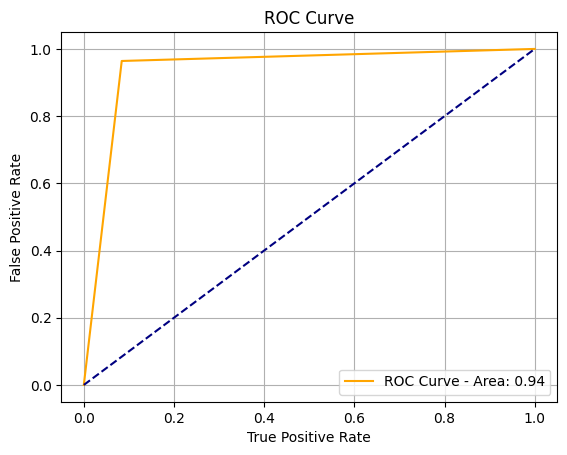

In [9]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
area_uc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve - Area: {area_uc:.2f}', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.grid(True)
plt.title("ROC Curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show()